In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
class arguments:
    def __init__(self, cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels):
        self.cond_block = cond_block #'later' #{early,later}
        self.cond_decoding = cond_decoding #'removeevoked' #{none,removeevoked,resampled}
        self.applyBaseline_bool = applyBaseline_bool #'False'
        self.mtdt_feat = mtdt_feat
        self.occ_channels = occ_channels
        
        self.SAVE_EPOCH_ROOT = '../../data/version5.2/preprocessed/epochs/aft_ICA_rej'
        self.SAVE_RESULT_ROOT = '../../results/ERPs/eCortex/'
        self.cond_filter ='none' # {none,non_symm}
        self.cond_time = 'prestim' #{prestim,poststim}
        self.subj_num = 1
        self.pre_tmin = -0.4
        self.pre_tmax = 0.05
        self.post_tmin = 0.05
        self.post_tmax = 0.45
        self.num_classes = 2
        self.normalization_type = 'normal'# {normal,lstmPaper}
        self.gen_rand_perm = 0
        self.null_max_iter = 10000
        self.loop_null_iter = 5
        self.gen_decoder_scores = 1
        self.random_state = 42 
        self.max_iter = 10000
        self.n_jobs = 1
        self.scoring = 'roc_auc'
        self.n_splits = 100
        print(self.SAVE_RESULT_ROOT)


# Autocorrelation

In [5]:
def set_fonts():
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Calibri')
    return font

def plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax):
    
    font=set_fonts()
    fsize_t=30
    fsize_x=26
    
    # EARLY ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_e[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_e[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_e[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_e[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Testing Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_e = np.mean(avgmap_e, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_e, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'earlyBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()
    
    # LATER ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_l[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_l[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_l[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_l[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_l = np.mean(avgmap_l, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_l, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'laterBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()


    plt.show()

In [23]:
def combine_subj_scores(args, subj_p1, subj_p2):

    ERP_p1=[]
    ERP_p2=[]
    ind_Grps_dt=4
    
    for subj_id in subj_p1:
        print('subject id:', subj_id)
        main_ptrn = 1
        args.subj_num = subj_id

        fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                    %(args.cond_block, args.cond_filter, \
                      args.cond_decoding, args.applyBaseline_bool, \
                      args.occ_channels, args.mtdt_feat, args.subj_num)

        fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj


        with open(fn_str, 'rb') as f:
            erps = pickle.load(f)
            
        erps_avgG1 = np.mean(erps[ind_Grps_dt].copy(), axis=1)
        ERP_p1.append(erps_avgG1.copy())


    for subj_id in subj_p2:
        main_ptrn = 2
        args.subj_num = subj_id

        fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                    %(args.cond_block, args.cond_filter, \
                      args.cond_decoding, args.applyBaseline_bool, \
                      args.occ_channels, args.mtdt_feat, args.subj_num)

        fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj


        with open(fn_str, 'rb') as f:
            erps = pickle.load(f)

        erps_avgG2 = np.mean(erps[ind_Grps_dt].copy(), axis=1)
        ERP_p2.append(erps_avgG2.copy())
        
    print('p1 subjects:',np.asarray(ERP_p1).shape)
    print('p2 subjects', np.asarray(ERP_p2).shape)

    p1=np.asarray(ERP_p1)
    p2=np.asarray(ERP_p2)
    p=np.concatenate((p1, p2), axis=0)

    subset = erps[0].copy()
    
    return p, subset

In [24]:
selected_subj_P1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 16, \
                    42, 43, 44, 45, 47, 48, 51, 52, 53, \
                    55, 56, 57, 58, 59, 60, 61, 62, 63, 64, \
                    66, 67, 68, 69, 71, 72, 73, 74]
selected_subj_P2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
                   31, 32, 33, 34, 35, 36, 38, 39]

# Conditions

In [25]:
# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_main', 'False' )
act_e, subset = combine_subj_scores(args, selected_subj_P1, selected_subj_P2)
print('p early all subjects:',act_e.shape)

# late ------------- #
args = arguments('later', 'removeevoked', 'False', 'Trgt_Loc_main', 'False' )
act_l, subset = combine_subj_scores(args, selected_subj_P1, selected_subj_P2)
print('p later all subjects:',act_l.shape)


../../results/ERPs/eCortex/
subject id: 1
subject id: 2
subject id: 3
subject id: 4
subject id: 5
subject id: 7
subject id: 8
subject id: 9
subject id: 10
subject id: 12
subject id: 15
subject id: 16
subject id: 42
subject id: 43
subject id: 44
subject id: 45
subject id: 47
subject id: 48
subject id: 51
subject id: 52
subject id: 53
subject id: 55
subject id: 56
subject id: 57
subject id: 58
subject id: 59
subject id: 60
subject id: 61
subject id: 62
subject id: 63
subject id: 64
subject id: 66
subject id: 67
subject id: 68
subject id: 69
subject id: 71
subject id: 72
subject id: 73
subject id: 74
p1 subjects: (39, 4, 129, 213)
p2 subjects (18, 4, 129, 213)
p early all subjects: (57, 4, 129, 213)
../../results/ERPs/eCortex/
subject id: 1
subject id: 2
subject id: 3
subject id: 4
subject id: 5
subject id: 7
subject id: 8
subject id: 9
subject id: 10
subject id: 12
subject id: 15
subject id: 16
subject id: 42
subject id: 43
subject id: 44
subject id: 45
subject id: 47
subject id: 48
subj

../../results/ERPs/eCortex/
subject id: 1
subject id: 2
subject id: 3
subject id: 4
subject id: 5
subject id: 7
subject id: 8
subject id: 9
subject id: 10
subject id: 12
subject id: 15
subject id: 16
subject id: 42
subject id: 43
subject id: 44
subject id: 45
subject id: 47
subject id: 48
subject id: 51
subject id: 52
subject id: 53
subject id: 55
subject id: 56
subject id: 57
subject id: 58
subject id: 59
subject id: 60
subject id: 61
subject id: 62
subject id: 63
subject id: 64
subject id: 66
subject id: 67
subject id: 68
subject id: 69
subject id: 71
subject id: 72
subject id: 73
subject id: 74
p1 subjects: (39, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p early all subjects: (57, 4, 44, 213)
../../results/ERPs/eCortex/
subject id: 1
subject id: 2
subject id: 3
subject id: 4
subject id: 5
subject id: 7
subject id: 8
subject id: 9
subject id: 10
subject id: 12
subject id: 15
subject id: 16
subject id: 42
subject id: 43
subject id: 44
subject id: 45
subject id: 47
subject id: 48
subject

In [28]:
# diff ------------- #
act_d = act_l - act_e
print('p diff all subjects:',act_d.shape)

evk_data_e = np.mean(act_e, axis=0)
evk_data_l = np.mean(act_l, axis=0)
evk_data_d = np.mean(act_d, axis=0)

print(act_e.shape)
print(act_l.shape)
print(act_d.shape)

print(evk_data_e.shape)
print(evk_data_l.shape)
print(evk_data_d.shape)

p diff all subjects: (57, 4, 129, 213)
(57, 4, 129, 213)
(57, 4, 129, 213)
(57, 4, 129, 213)
(4, 129, 213)
(4, 129, 213)
(4, 129, 213)


# All channels

(4, 129, 213)
(4, 129, 213)


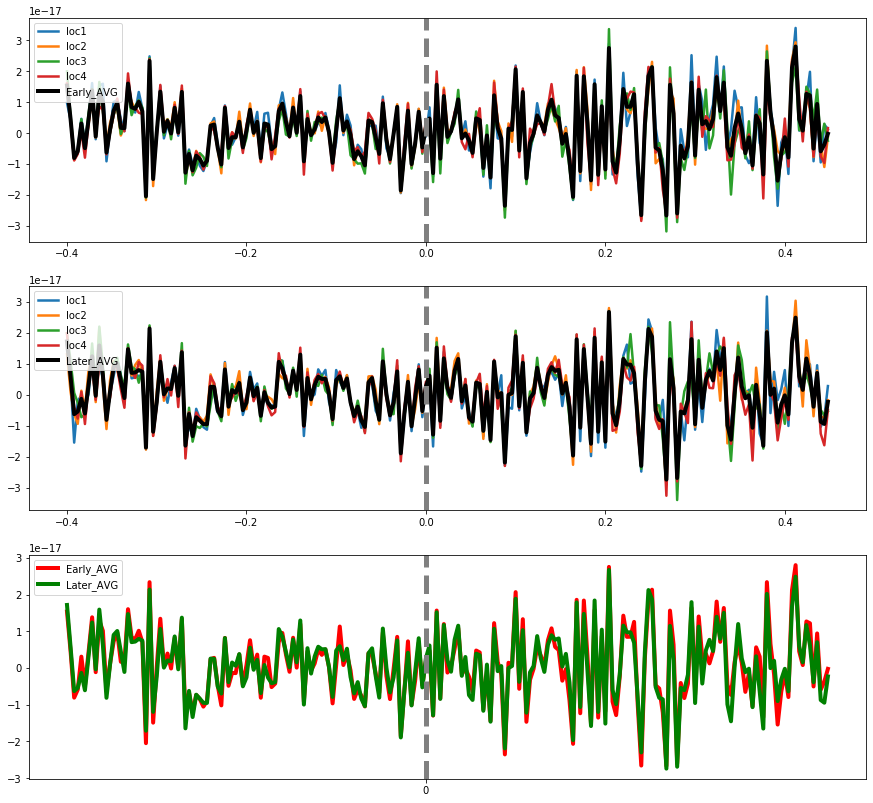

In [40]:
from scipy.signal import savgol_filter
import matplotlib.pylab as plt


fig, ax = plt.subplots(3,1,figsize=(15,14))

lw1=2.5
lw2=4

print(evk_data_e.shape)
print(evk_data_l.shape)
avgChann_e = np.mean(evk_data_e.copy(), axis=1)
avgChann_l = np.mean(evk_data_l.copy(), axis=1)

ax[0].plot(subset.times, avgChann_e[0,:], linewidth=lw1)
ax[0].plot(subset.times, avgChann_e[1,:], linewidth=lw1)
ax[0].plot(subset.times, avgChann_e[2,:], linewidth=lw1)
ax[0].plot(subset.times, avgChann_e[3,:], linewidth=lw1)
ax[0].plot(subset.times, np.mean(avgChann_e, 0), linewidth=lw2, color='black')

ax[0].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Early_AVG'], loc='upper left')


avgChann_e = np.mean(evk_data_e.copy(), axis=1)

ax[1].plot(subset.times, avgChann_l[0,:], linewidth=lw1)
ax[1].plot(subset.times, avgChann_l[1,:], linewidth=lw1)
ax[1].plot(subset.times, avgChann_l[2,:], linewidth=lw1)
ax[1].plot(subset.times, avgChann_l[3,:], linewidth=lw1)
ax[1].plot(subset.times, np.mean(avgChann_l, 0), linewidth=lw2, color='black')

ax[1].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Later_AVG'], loc='upper left')



plt.xticks(subset.times*1000)

ax[2].plot(subset.times, np.mean(avgChann_e, 0), color='red', linewidth=lw2)
ax[2].plot(subset.times, np.mean(avgChann_l, 0), color='green', linewidth=lw2)
ax[2].legend(['Early_AVG', 'Later_AVG'], loc='upper left')

for ii in range(3):
    ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
plt.show()

# only occipital channels

In [70]:
from scipy.signal import savgol_filter
import matplotlib.pylab as plt

def plot_evoked_plotV1(evk_data_e_occ, evk_data_l_occ, title):
    fig, ax = plt.subplots(3,1,figsize=(15,14))
    
    fig.suptitle(title, fontsize=16)

    lw1=2.5
    lw2=4

    print(evk_data_e_occ.shape)
    print(evk_data_l_occ.shape)
    
    avgChann_e_occ = np.mean(evk_data_e_occ.copy(), axis=1)
    avgChann_l_occ = np.mean(evk_data_l_occ.copy(), axis=1)

    ax[0].plot(subset.times, avgChann_e_occ[0,:], linewidth=lw1)
    ax[0].plot(subset.times, avgChann_e_occ[1,:], linewidth=lw1)
    ax[0].plot(subset.times, avgChann_e_occ[2,:], linewidth=lw1)
    ax[0].plot(subset.times, avgChann_e_occ[3,:], linewidth=lw1)
    ax[0].plot(subset.times, np.mean(avgChann_e_occ, 0), linewidth=lw2, color='black')

    ax[0].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Early_AVG'], loc='upper left')


    avgChann_e = np.mean(evk_data_e.copy(), axis=1)

    ax[1].plot(subset.times, avgChann_l_occ[0,:], linewidth=lw1)
    ax[1].plot(subset.times, avgChann_l_occ[1,:], linewidth=lw1)
    ax[1].plot(subset.times, avgChann_l_occ[2,:], linewidth=lw1)
    ax[1].plot(subset.times, avgChann_l_occ[3,:], linewidth=lw1)
    ax[1].plot(subset.times, np.mean(avgChann_l_occ, 0), linewidth=lw2, color='black')

    ax[1].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Later_AVG'], loc='upper left')



    plt.xticks(subset.times*1000)

    ax[2].plot(subset.times, np.mean(avgChann_e_occ, 0), color='red', linewidth=lw2)
    ax[2].plot(subset.times, np.mean(avgChann_l_occ, 0), color='green', linewidth=lw2)

    diff_sig_occ = np.mean(avgChann_l_occ.copy(), 0) - np.mean(avgChann_e_occ.copy(), 0)
    ax[2].plot(subset.times, diff_sig_occ, color='blue', linewidth=lw2, linestyle='--')
    ax[2].legend(['Early_AVG', 'Later_AVG', 'Diff (Late - Early)'], loc='upper left')

    for ii in range(3):
        ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')

    plt.show()

In [ ]:
# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_main', 'True' )
act_e_occ, subset_occ = combine_subj_scores(args, selected_subj_P1, selected_subj_P2)
print('p early all subjects:',act_e_occ.shape)

# late ------------- #
args = arguments('later', 'removeevoked', 'False', 'Trgt_Loc_main', 'True' )
act_l_occ, subset_occ = combine_subj_scores(args, selected_subj_P1, selected_subj_P2)
print('p later all subjects:',act_l_occ.shape)

# diff ------------- #
act_d_occ = act_l_occ - act_e_occ
print('p diff all subjects:',act_d_occ.shape)

evk_data_e_occ = np.mean(act_e_occ, axis=0)
evk_data_l_occ = np.mean(act_l_occ, axis=0)
evk_data_d_occ = np.mean(act_d_occ, axis=0)

print(act_e_occ.shape)
print(act_l_occ.shape)
print(act_d_occ.shape)

print(evk_data_e_occ.shape)
print(evk_data_l_occ.shape)
print(evk_data_d_occ.shape)

(4, 44, 213)
(4, 44, 213)


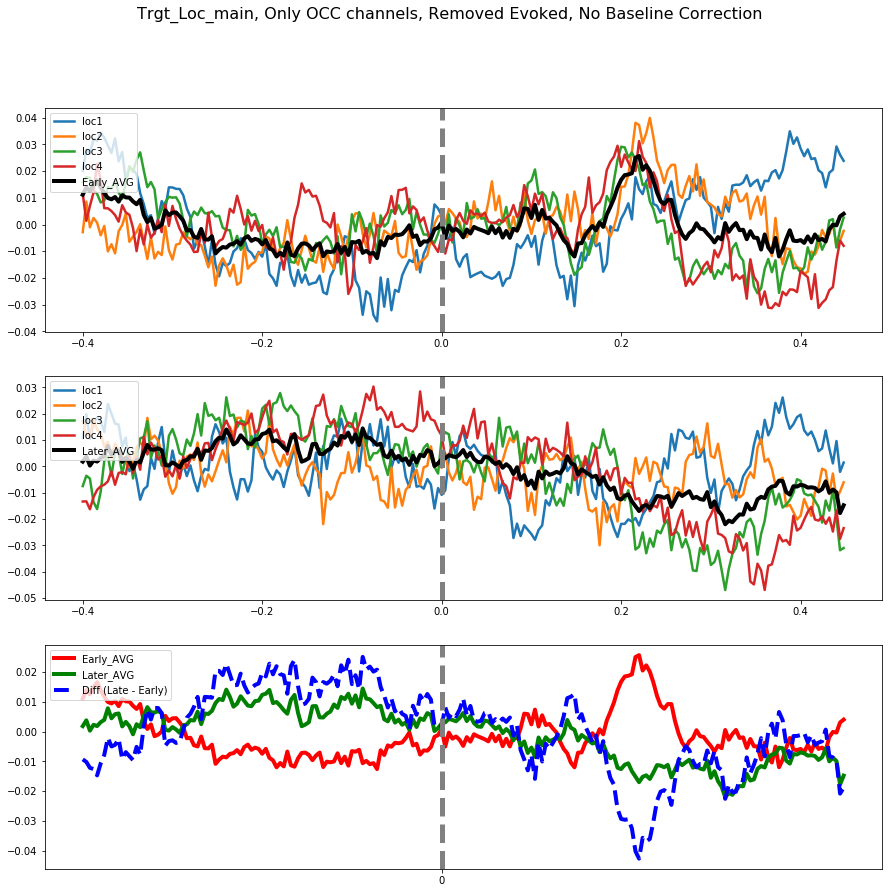

In [71]:
title = 'Trgt_Loc_main, Only OCC channels, Removed Evoked, No Baseline Correction'
plot_evoked_plotV1(evk_data_e_occ, evk_data_l_occ, title)

In [73]:
from scipy.signal import savgol_filter

def plot_evoked_plotV2(avgChann_e_occ, avgChann_e_occ, title):
    fig, ax = plt.subplots(5,1,figsize=(13,12))

    lw1=2.5
    lw2=4


    ax[0].plot(subset.times, avgChann_e_occ[0,:], linewidth=lw1)
    ax[0].plot(subset.times, avgChann_l_occ[0,:], linewidth=lw1)
    ax[0].legend(['loc1 - Left - Early', 'loc1 - Left - Later'], loc='upper left')

    ax[1].plot(subset.times, avgChann_e_occ[1,:], linewidth=lw1)
    ax[1].plot(subset.times, avgChann_l_occ[1,:], linewidth=lw1)
    ax[1].legend(['loc2 - Top - Early', 'loc2 - Top - Later'], loc='upper left')

    ax[2].plot(subset.times, avgChann_e_occ[2,:], linewidth=lw1)
    ax[2].plot(subset.times, avgChann_l_occ[2,:], linewidth=lw1)
    ax[2].legend(['loc3 - Right - Early', 'loc3 - Right - Later'], loc='upper left')

    ax[3].plot(subset.times, avgChann_e_occ[3,:], linewidth=lw1)
    ax[3].plot(subset.times, avgChann_l_occ[3,:], linewidth=lw1)
    ax[3].legend(['loc4 - Bottom - Early', 'loc4 - Bottom - Later'], loc='upper left')

    ax[4].plot(subset.times,  np.mean(avgChann_e_occ, 0), color='red', linewidth=lw2)
    ax[4].plot(subset.times,  np.mean(avgChann_l_occ, 0), color='green', linewidth=lw2)
    diff_sig_occ = np.mean(avgChann_l_occ.copy(), 0) - np.mean(avgChann_e_occ.copy(), 0)
    ax[4].plot(subset.times, diff_sig_occ, color='blue', linewidth=lw2, linestyle='--')
    ax[4].legend(['Early_AVG', 'Later_AVG', 'Diff (Late - Early)'], loc='upper left')


    for ii in range(5):
        ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
    plt.show()

SyntaxError: duplicate argument 'avgChann_e_occ' in function definition (<ipython-input-73-4bc2d896ab7a>, line 6)

In [65]:
print(act_e_occ.shape)
print(act_l_occ.shape)
print(act_d_occ.shape)

print(evk_data_e_occ.shape)
print(evk_data_l_occ.shape)
print(evk_data_d_occ.shape)


(57, 4, 44, 213)
(57, 4, 44, 213)
(57, 4, 44, 213)
(4, 44, 213)
(4, 44, 213)
(4, 44, 213)


In [62]:
from sklearn.metrics.pairwise import cosine_similarity
# avg = 

mapr_e = np.zeros((4, evk_data_e_occ.shape[2], evk_data_e_occ.shape[2]))
mapr_l = np.zeros((4, evk_data_l_occ.shape[2], evk_data_l_occ.shape[2]))

mapr_e[0,:,:] = cosine_similarity(X=evk_data_e_occ[0,:,:].copy().T, Y=None).T
mapr_e[1,:,:] = cosine_similarity(X=evk_data_e_occ[1,:,:].copy().T, Y=None).T
mapr_e[2,:,:] = cosine_similarity(X=evk_data_e_occ[2,:,:].copy().T, Y=None).T
mapr_e[3,:,:] = cosine_similarity(X=evk_data_e_occ[3,:,:].copy().T, Y=None).T

mapr_l[0,:,:] = cosine_similarity(X=evk_data_l_occ[0,:,:].copy().T, Y=None).T
mapr_l[1,:,:] = cosine_similarity(X=evk_data_l_occ[1,:,:].copy().T, Y=None).T
mapr_l[2,:,:] = cosine_similarity(X=evk_data_l_occ[2,:,:].copy().T, Y=None).T
mapr_l[3,:,:] = cosine_similarity(X=evk_data_l_occ[3,:,:].copy().T, Y=None).T

mapr_d = mapr_l - mapr_e

In [63]:
avgmap_e = mapr_e.copy()#np.mean(mapr_e, axis=0)
avgmap_l = mapr_l.copy()#np.mean(mapr_l, axis=0)
avgmap_d = mapr_d.copy()#np.mean(mapr_d, axis=0)


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


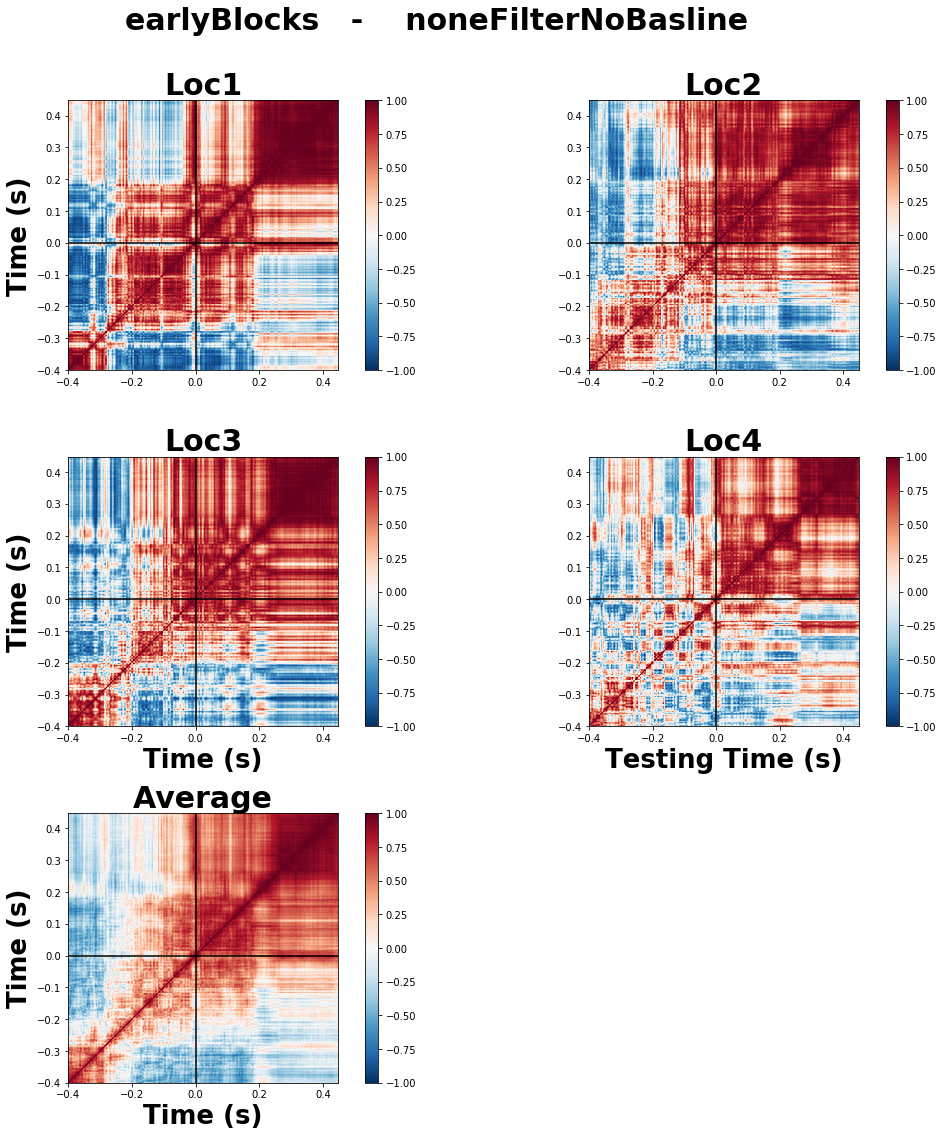

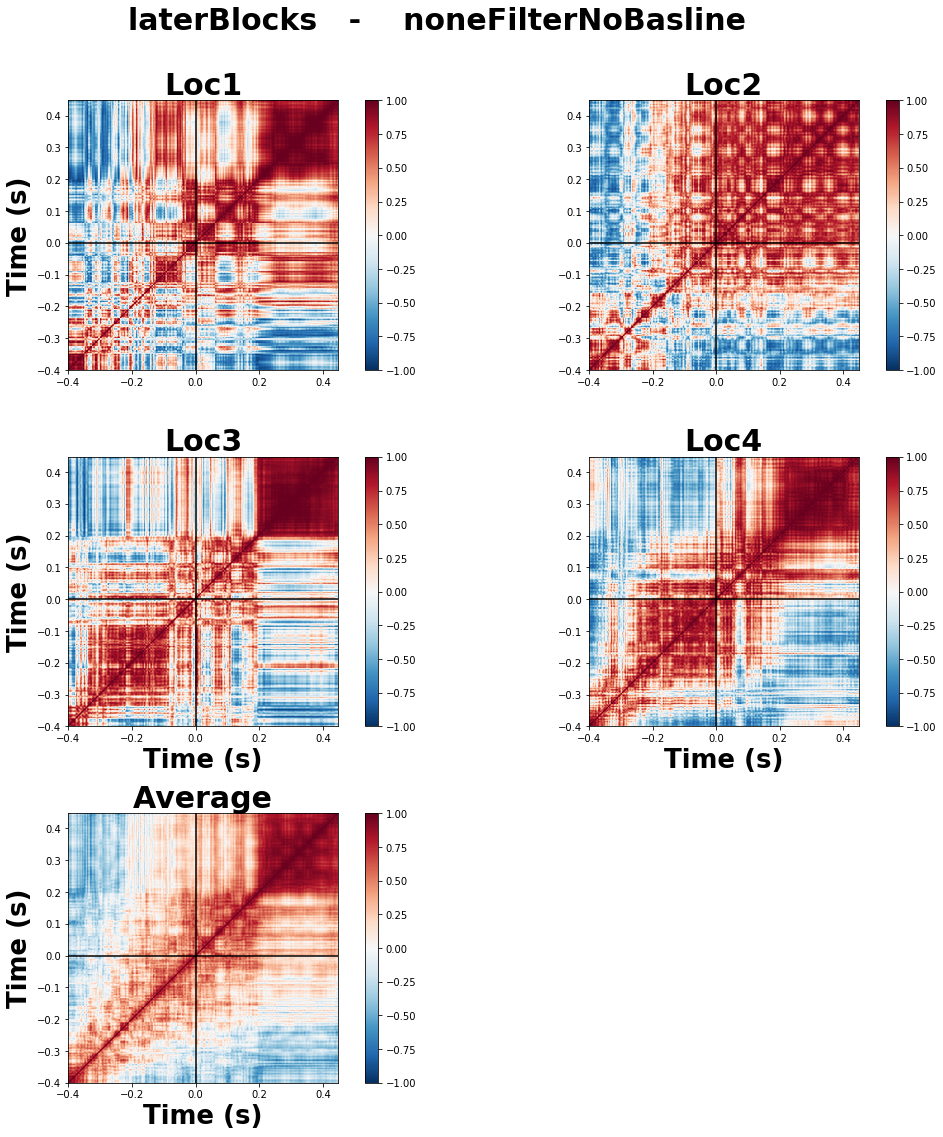

In [64]:
#  plot ------------- #
vmin=-1
vmax=1
title='noneFilterNoBasline'

plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)